# Figures

Here we reproduces the figures of the manuscript using the provided source data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import scipy as scp
import scipy.special
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats
from matplotlib import cm, ticker, colors
from matplotlib.patches import Rectangle

fsize = 12.5
tsize = 12
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('seaborn-colorblind')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle
plt.rc("savefig", dpi=600)
plt.rcParams['axes.titley'] = 1.0
titles = ["(a)","(b)","(c)","(d)"]
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)

import warnings
warnings.filterwarnings('ignore')

/home/ofirblumer/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


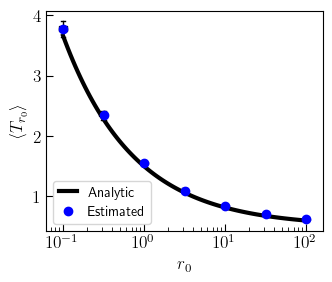

In [2]:
fig, ax = plt.subplots(figsize = (3.5, 3))

x0 = 1
D = 1
xr = 1
rate = np.logspace(-1, 2, 100)

ax.plot(rate, (-x0 ** 2 / (2 * D) + x0 * (xr / D + 1 / np.sqrt(rate * D))), linewidth=3,c = "black")
ax.boxplot(list(np.loadtxt("data/assymetricSR")), showfliers = False, patch_artist = True, positions = np.logspace(-1, 2, 7), manage_ticks = False,
           widths = width(np.logspace(-1, 2, 7), 0.1), medianprops = {"color": "none"}, showmeans = True,
           boxprops = {"facecolor": "none"}, meanprops = {"marker": "o", "markerfacecolor": "blue", "markeredgecolor": "blue"})

ax.set_xscale("log")
ax.set_xlabel(r"$r_0$")
ax.set_ylabel(r"$\langle T_{r_0} \rangle$")
ax.legend(["Analytic"] + ["__no_legend__" for i in range(5)] + ["Estimated"], fontsize = 10, loc = "lower left", handlelength = 1.3)
fig.tight_layout()

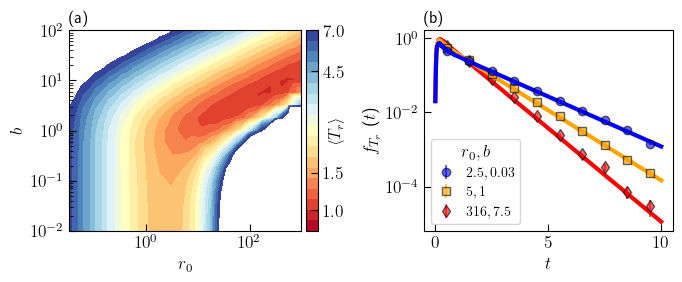

In [3]:
data = pd.read_csv("data/bioInspired.csv")

fig, axs = plt.subplots(1, 2, figsize = (7, 3))

im = axs[0].tricontourf(data.r0, data.b, data.MFPT, locator = ticker.LogLocator(),
                        levels = np.logspace(np.log10(0.8), np.log10(7.), 20), cmap = "RdYlBu")
axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel(r"$r_0$")
axs[0].set_ylabel(r"$b$")

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
cbar = fig.colorbar(im, format = formatter, cax = cax)
cbar.ax.yaxis.set_minor_locator(ticker.NullLocator())
cbar.set_ticks([1,1.5,4.5,7])
cbar.ax.set_ylabel(r"$\langle T_r \rangle$", fontsize = 12, labelpad = -12)

markers = ["o","s","d"]
colorsList = ["blue","orange","red"]
for i in range(3):
    axs[1].plot(np.linspace(0,10,9951), np.loadtxt(f"data/distPre{i}"), c = colorsList[i], zorder = 3 - i, linewidth = 3)
    histos = np.loadtxt(f"data/distSim{i}")
    axs[1].errorbar(np.linspace(0.5,9.5,10), histos.mean(axis=0), histos.std(axis = 0) / np.sqrt(10),
                    linestyle = "none", marker = markers[i], color = colorsList[i], alpha = 0.6, markeredgecolor = "black", zorder = 3 - i)
    
axs[1].legend(["__no_legend__","__no_legend__","__no_legend__",r"$2.5,0.03$",r"$5,1$",r"$316,7.5$"], title = r"$r_0,b$", fontsize = 10, handlelength = 1.3)
axs[1].set_xlabel(r"$t$")
axs[1].set_ylabel(r"$f_{T_r}$ ($t$)")
for i in range(2):
    axs[i].set_title(titles[i], loc = "left", fontsize = 12)
axs[1].set_yscale("log")
axs[1].set_xlim(-0.5,10.5)

fig.tight_layout()

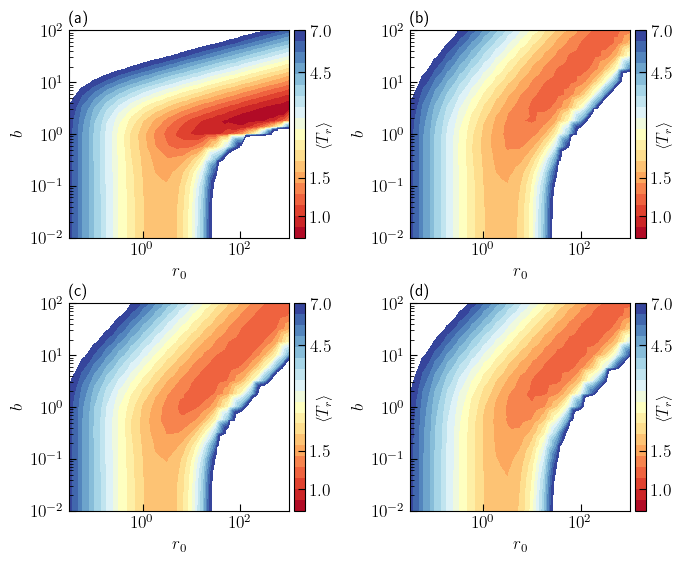

In [4]:
fig, axs = plt.subplots(2,2,figsize=(7,5.8))
axs = axs.flatten()
for i in range(4):
    data = pd.read_csv(f"data/SIfig3{titles[i][1]}")
    data = data.loc[data.MFPT < 100]
    im = axs[i].tricontourf(data.r0, data.b, data.MFPT, locator = ticker.LogLocator(), levels = np.logspace(np.log10(0.8), np.log10(7.), 20), cmap = "RdYlBu")
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_xlabel(r"$r_0$")
    axs[i].set_ylabel(r"$b$")

    formatter = ticker.ScalarFormatter()
    formatter.set_scientific(False)
    divider = make_axes_locatable(axs[i])

    cax = divider.append_axes('right', size = '5%', pad = 0.05)
    cbar = fig.colorbar(im, format = formatter, cax = cax)
    cbar.ax.yaxis.set_minor_locator(ticker.NullLocator())
    cbar.set_ticks(np.array([1,1.5,4.5,7]))
    cbar.ax.set_ylabel(r"$\langle T_r \rangle$", fontsize = 12, labelpad = -12)
    axs[i].set_title(titles[i], loc = "left", fontsize = 12)
    
fig.tight_layout(h_pad = 0.2)

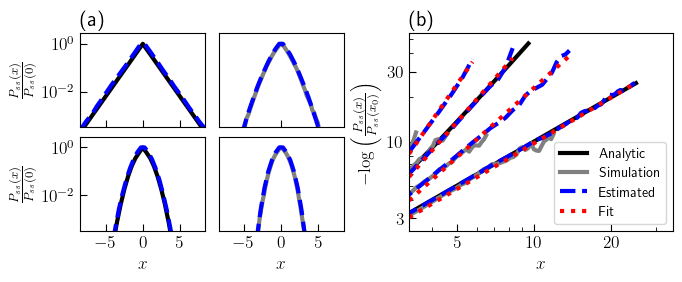

In [11]:
fig, allAx = plt.subplots(1,2, figsize = (7, 3.))
axs = [allAx[0].inset_axes([0.,0.525,0.475,0.475]), allAx[0].inset_axes([0.525,0.525,0.475,0.475]),
       allAx[0].inset_axes([0.,0.,0.475,0.475]), allAx[0].inset_axes([0.525,0.,0.475,0.475])]

xs = np.linspace(-25, 25, 101)
bins = 0.5*(xs[:-1]+xs[1:])

axs[0].plot(xs, np.exp(-abs(xs)), color="black", linewidth=3)
allAx[1].plot(xs, xs, color="black", linewidth=3)
ys = np.sqrt(2*abs(xs-0.001)/np.pi)/scp.special.gamma(0.25)*scp.special.kn(0.25,0.5*(xs-0.001)**2)
ys[50] = 1 / np.sqrt(np.pi)
axs[2].plot(xs, np.sqrt(np.pi) * ys, color="black", linewidth=3)
allAx[1].plot(xs[:70], -np.log(np.sqrt(np.pi) * ys[:70]), color="black", linewidth=3)

for j in range(2):
    axs[j].set_xticklabels(["","",""])
    axs[j+2].set_xlabel(r"$x$")
    axs[j*2+1].plot(*np.loadtxt(f"data/power{j*2+1}sim"), color = 'gray', linewidth=3)    
    axs[j*2].set_ylabel(r"$\frac{P_{ss}(x)}{P_{ss}(0)}$")

for j in range(4):
    fes -= fes.max()
    axs[j].plot(bins, np.loadtxt(f"data/power{j}pre") / np.loadtxt(f"data/power{j}pre")[50], c = "blue", linestyle = "dashed", linewidth=3)
    axs[j].set_xlim(-1.7*5, 1.7*5)
    axs[j].set_ylim(np.exp(-8), np.exp(1))
    axs[j].set_xticks([-5,0,5])
    axs[j].set_yscale("log")
    allAx[1].plot(np.loadtxt(f"data/power{j}simAbs")[0], -np.log(np.loadtxt(f"data/power{j}simAbs")[1]), color = 'gray', linewidth=3) 
    allAx[1].plot(bins[50:],-np.log(np.loadtxt(f"data/power{j}preAbs")), color = "blue", linestyle = "dashed", linewidth=3)
    allAx[1].plot(*np.loadtxt(f"data/linFits{j}"), color = "red", linestyle = "dotted", linewidth=3)
    
allAx[0].set_xticks([])
allAx[0].set_yticks([])
allAx[0].spines[['left','right','top',"bottom"]].set_visible(False)
allAx[1].set_xscale("log")
allAx[1].set_yscale("log")
allAx[1].set_xlim(3.25)
allAx[1].set_ylim(np.exp(0.9),np.exp(4))
allAx[1].set_xlabel(r"$x$")
allAx[1].legend(["_nolegend","Analytic","Simulation","Estimated","Fit"],fontsize=10)
allAx[1].set_ylabel(r"$-\mathrm{log}\left(\frac{P_{ss}(x)}{P_{ss}(x_0)}\right)$")
allAx[1].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
allAx[1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
allAx[1].set_xticks([5,10,20])
allAx[1].set_yticks([3,10,30])
allAx[0].set_title("(a)",loc="left")
allAx[1].set_title("(b)",loc="left")
axs[1].set_yticks([])
axs[3].set_yticks([])

fig.tight_layout(h_pad=0.75,w_pad=0.4)

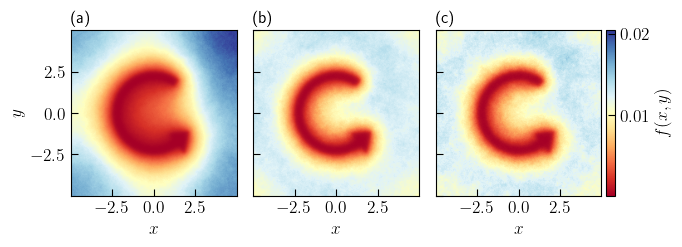

In [6]:
fig, axs = plt.subplots(1, 3, figsize = (7, 3))

vmin = np.loadtxt("data/fig5a").min()
vmax = np.loadtxt("data/fig5a").max()
for ax, panel in zip(axs, titles):
    
    name = f"data/fig5{panel[1]}"
    im = ax.imshow(np.loadtxt(name), extent=([-5, 5, -5, 5]), origin = "lower", cmap = "RdYlBu", vmin = vmin, vmax = vmax)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size = '5%', pad = 0.05)
    if panel != "(c)":
        cax.set_xticks([])
        cax.set_yticks([])
        cax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    if panel != "(a)":
        ax.set_yticklabels([])
    ax.set_xticks([-2.5, 0, 2.5])
    ax.set_title(panel, loc="left", fontsize=12)
    ax.set_xlabel(r"$x$")
    
axs[0].set_yticks([-2.5, 0, 2.5])
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
bar = fig.colorbar(im, cax = cax, orientation = "vertical")
cax.set_ylabel(r"$f(x,y)$")
axs[0].set_ylabel(r"$y$")

fig.tight_layout(w_pad=0.2)

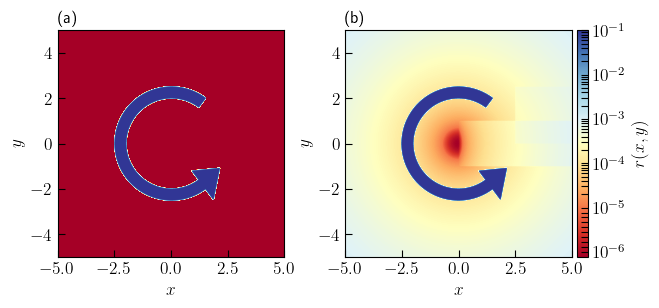

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (7, 3))

Vs = np.empty((2000,2000))
x = np.linspace(-5,5,2000)
y = np.linspace(-5,5,2000)
for i in range(2000):
    for j in range(2000):
        if np.sqrt(x[i]**2+y[j]**2)>2 and np.sqrt(x[i]**2+y[j]**2)<2.5 and x[i]<1.5:
            V = 0.1
        else:
            V = 0
        if y[j] > 1 and (2./1.5*x[i]-y[j]) > 0:
            V = 0
        if (-2/1.5*x[i]-y[j]) < 0 and (0.1*x[i]-y[j]-1.3) >0 and (5*x[i]-y[j] -11.7) < 0:
            V = 0.1
        Vs[i][j] = V
        
axs[0].imshow(Vs.T, cmap = "RdYlBu", extent = ([-5,5,-5,5]), origin = "lower", norm = colors.SymLogNorm(linthresh=0.00001))

xs = np.linspace(-5,5,2000)
ys = np.linspace(-5,5,2000)
r = np.empty((2000,2000))
for i in range(2000):
    for j in range(2000):
        if np.sqrt(xs[i]**2+ys[j]**2)>2 and np.sqrt(xs[i]**2+ys[j]**2)<2.5 and xs[i]<1.5:
            r[i][j] = 0.1
        else:
            r[i][j] = 0.0005 * (np.sqrt(xs[i]**2+ys[j]**2)/5)**2
            if xs[i]>0 and ys[j]<1 and ys[j]>-1:
                r[i][j] += 0.00005*xs[i]
            if xs[i]>2.5 and ys[j]<2.5 and ys[j]>0:
                r[i][j] += 0.0001
        if ys[j] > 1 and (2./1.5*xs[i]-ys[j]) > 0:
            r[i][j] = 0.0005 * (np.sqrt(xs[i]**2+ys[j]**2)/5)**2
            if xs[i]>0 and ys[j]<1 and ys[j]>-1:
                r[i][j] += 0.00005*xs[i]
            if xs[i]>2.5 and ys[j]<2.5 and ys[j]>0:
                r[i][j] += 0.0001
        if (-2/1.5*xs[i]-ys[j]) < 0 and (0.1*xs[i]-ys[j]-1.3) >0 and (5*xs[i]-ys[j] -11.7) < 0:
            r[i][j] = 0.1

im = axs[1].imshow(r.T, extent = ([-5,5,-5,5]), origin = "lower", norm = colors.SymLogNorm(linthresh=0.00001), cmap = "RdYlBu")
axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')
axs[1].set_xlabel(r"$x$")
axs[0].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$y$")

divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
fig.colorbar(im, cax = cax, orientation = "vertical")
cax.set_ylabel(r"$r(x,y)$")

for i in range(2):
    axs[i].set_title(titles[i], loc = "left", fontsize = 12)
    axs[i].set_aspect('equal', adjustable='box')
    axs[i].set_xlabel(r"$x$")
    axs[i].set_ylabel(r"$y$")